In [50]:
# Operating System
import os

import pandas as pd
import numpy as np

import random

import matplotlib.pyplot as plt
%matplotlib inline

# Strings
import re

# Load original data

In [2]:
#file_path = ".\data\train.csv"
file_path = os.path.join('data', 'train.csv')


# # Option 1 for reading a sample of the file
# n_total_rows = 2437645
# prc_rows_to_read = 10
# n_rows_to_read = int(prc_rows_to_read/100*n_total_rows)
# n_rows_to_skip = n_total_rows - n_rows_to_read

# random.seed(178) # this is to get always the same sample. can be removed if we want the sample to change
# list_of_rows_to_skip = random.sample(
#     range(1, n_total_rows-1), # this is a range from the first row after the header, to the last row on the file
#     n_rows_to_skip # this is the number of rows we want to sample, i.e, to skip
# )


# Option 2 for reading a sample of the file
# sample 10% of the rows
p = 1

try:
    df_original = pd.read_csv(file_path, 
                             skiprows = lambda row_num: random.random() > p and row_num > 0, 
                             #nrows = 10000, 
                             header=0,
                             warn_bad_lines=True)
except:
    print('Ooops!!! We got an error!')


# Transform data to analysis

In [51]:
remane_columns_dict = {'VehicleSearchedIndicator': 'search', 
                       'ContrabandIndicator': 'target', 
                       'Department Name': 'departm',
                       'InterventionDateTime': 'date',
                       'InterventionLocationName': 'local',
                       'InterventionReasonCode': 'reason',
                       'ReportingOfficerIdentificationID': 'officerID',
                       'ResidentIndicator': 'state_res',
                       'SearchAuthorizationCode': 'search_reason',
                       'StatuteReason': 'stop_reason',
                       'SubjectAge': 'age',
                       'SubjectEthnicityCode': 'ethnic',
                       'SubjectRaceCode': 'race',
                       'SubjectSexCode': 'sex',
                       'TownResidentIndicator': 'town_res'
                      }

In [52]:
def simple_clean(doc, regex_list=[("[\.\?\(\)\|:;_!@/*\-]", " "), (" +", " ")] ):
    
    # Make sure it is a string!
    doc = str(doc)
    
    # remove or replace characters
    for regex in regex_list:
        doc = re.sub(regex[0], regex[1], doc)
    # lowercase
    doc = doc.lower()
    # Trim
    doc = doc.strip()
    # tokenize
    #words = tokenizer.tokenize(doc)
    # remove punctuation
    #words = list(filter(lambda x: x not in string.punctuation, words))
    # stem
    #stems = list(map(stemmer.stem, words))
    #new_doc = " ".join(stems)
    new_doc = doc
    return new_doc

In [53]:
def data_transformer(df_original: pd.DataFrame, columns_dict: dict) -> pd.DataFrame:
    """Transforms the original DataFrame to make it suited for data analysis.
    
    Args:
        df_original (pd.DataFrame):  Original DataFrame, as imported by pd.read_csv().
        columns_dict (dict): Correspondence between old a new column names.
        
    Returns:
        df (pd.DataFrame): Transformed DataFrame, ready for data analysis.
        
    TODO:
        * to do list
        
    """
    
    df = df_original.copy()
    
    # change column names
    df = df.rename(columns = columns_dict)
    
    # convert date to pd.datetime
    df.date = pd.to_datetime(df.date)
    
    # convert Intervention DateTime to index of the DataFrame
    #df = df.set_index('date').sort_index()
    
    # Clean strings from special characters and multiple spaces
    df.local = df.local.apply(simple_clean)
    df.departm = df.departm.apply(simple_clean)
    df.stop_reason = df.stop_reason.apply(simple_clean)
   
    return df

df = data_transformer(df_original, remane_columns_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473643 entries, 0 to 2473642
Data columns (total 15 columns):
search           bool
target           bool
departm          object
date             datetime64[ns]
local            object
reason           object
officerID        object
state_res        bool
search_reason    object
stop_reason      object
age              float64
ethnic           object
race             object
sex              object
town_res         bool
dtypes: bool(4), datetime64[ns](1), float64(1), object(9)
memory usage: 217.0+ MB


### Useful variable

In [62]:
nobs = df.shape[0]

In [64]:
nsearch = df[df.search==True].shape[0]

In [6]:
print("Number of car stops: {:,d}".format(df.shape[0]).replace(',', ' '))


Number of car stops: 2 473 643


In [7]:
print("Percentage of searches:")
df.search.value_counts(normalize=True, dropna=False)*100

Percentage of searches:


False    96.897572
True      3.102428
Name: search, dtype: float64

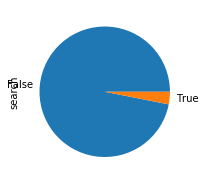

In [8]:
df.search.value_counts().plot.pie(figsize=(3,3));

In [9]:
print("Percentage of counterband discovers:")
df.target.value_counts(normalize=True, dropna=False)*100

Percentage of counterband discovers:


False    98.854281
True      1.145719
Name: target, dtype: float64

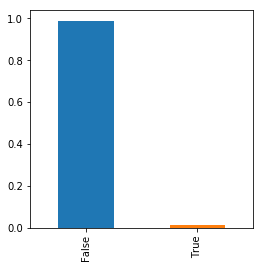

In [10]:
df.target.value_counts(normalize=True).plot.bar(figsize=(4,4));

In [11]:
print("Percentage of counterband discovers when car not searched:")
df[df.search==False].target.value_counts(normalize=True, dropna=False)*100

Percentage of counterband discovers when car not searched:


False    99.882223
True      0.117777
Name: target, dtype: float64

In [12]:
print("Percentage of counterband discovers when searched:")
df[df.search==True].target.value_counts(normalize=True, dropna=False)*100

Percentage of counterband discovers when searched:


False    66.748759
True     33.251241
Name: target, dtype: float64

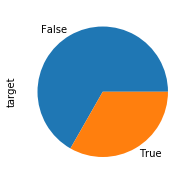

In [13]:
df[df.search==True].target.value_counts().plot.pie(figsize=(3,3));

In [14]:
df.departm.nunique()

122

In [15]:
pctl = (np.array([1,5] + list(range(10,90,10)) + [95,99])*0.01).round(decimals=2).tolist()
df.departm.value_counts().describe(percentiles=pctl)

count       122.000000
mean      20275.762295
std       31234.830850
min           4.000000
1%            5.840000
5%          217.650000
10%        1314.900000
20%        4383.400000
30%        8514.900000
40%       11984.200000
50%       14754.000000
60%       18054.000000
70%       23958.700000
80%       30324.000000
95%       50132.250000
99%       68511.830000
max      322003.000000
Name: departm, dtype: float64

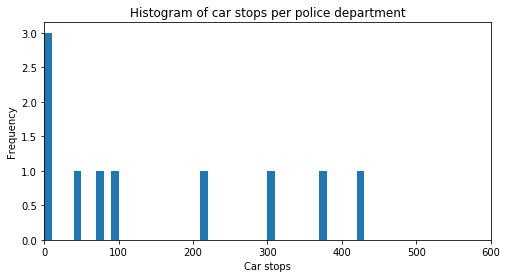

In [58]:
df.departm.value_counts().plot.hist(xlim= (0,600), bins=range(0,600,10), figsize=(8,4))
plt.title('Histogram of car stops per police department')
plt.xlabel('Car stops');

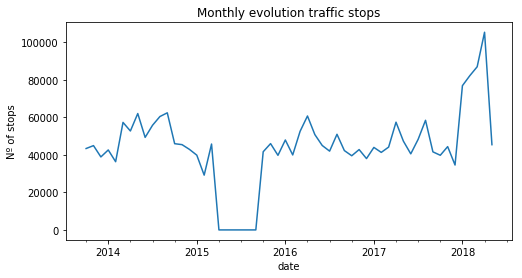

In [94]:
df.set_index('date').sort_index().resample('M').search.count().plot(figsize=(8, 4))

plt.title('Monthly evolution traffic stops')
#plt.xlabel("Success rate")
plt.ylabel("Nº of stops")

plt.savefig(os.path.join('plots', 'stops_per_month.png'));

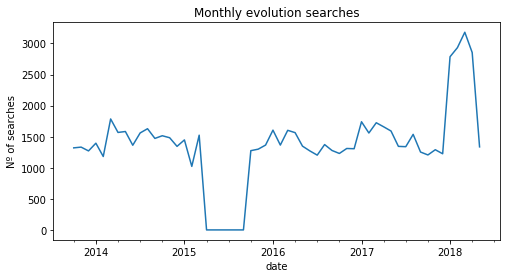

In [95]:
search_dt_series = df.set_index('date').sort_index().search.where(lambda x: x==True).dropna()
search_dt_series.resample('M').count().plot(figsize=(8, 4))

plt.title('Monthly evolution searches')
plt.ylabel("Nº of searches")

plt.savefig(os.path.join('plots', 'searches_per_month.png'));

#search_dt_series.resample('M').count()
#search_dt_series[search_dt_series == True]
#df.date.dt.to_period('M')
#smonth.groupby(smonth).count()

In [76]:
df_daily = df.set_index('date').sort_index().resample('D').count()

In [98]:
df.local.value_counts(dropna=False)

new haven               90453
stamford                55254
hartford                52219
wallingford             47808
danbury                 47610
manchester              46756
windsor                 44083
new britain             41634
east hartford           40937
fairfield               39060
enfield                 38225
west hartford           37849
torrington              37575
westport                37203
norwich                 33748
norwalk                 33261
ridgefield              32593
west haven              32039
groton                  31215
newtown                 31119
waterbury               30946
bridgeport              30285
vernon                  29606
branford                28962
southington             27269
milford                 27229
berlin                  26359
hamden                  26244
naugatuck               26063
waterford               26016
                        ...  
durand east main            1
albert street wilson        1
main st ci

In [96]:
df.local.nunique()

1500

In [121]:
pctl = (np.array([1,5] + list(range(10,90,10)) + [95,99])*0.01).round(decimals=2).tolist()
df.local.value_counts().describe(percentiles=pctl)

count     1500.000000
mean      1649.095333
std       6476.066181
min          1.000000
1%           1.000000
5%           1.000000
10%          1.000000
20%          1.000000
30%          1.000000
40%          1.000000
50%          1.000000
60%          2.000000
70%          3.000000
80%          9.000000
95%      11816.100000
99%      33265.870000
max      90453.000000
Name: local, dtype: float64

In [124]:
df.groupby('local').target.count().where(lambda x: x>11816.1).dropna().mean()

26254.453333333335

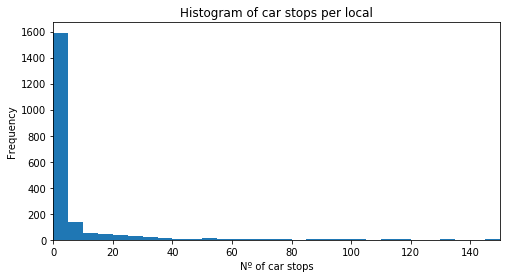

In [20]:
df.local.value_counts().plot.hist(xlim= (0,150), bins=range(0,200,5), figsize=(8,4))
plt.title('Histogram of car stops per local')
plt.xlabel('Nº of car stops');

In [126]:
df.reason.value_counts(dropna=False)

V      2179595
E       245030
I        49013
no           3
NaN          2
Name: reason, dtype: int64

In [129]:
df.reason.value_counts(dropna=False, normalize=True)*100

V      88.112755
E       9.905633
I       1.981410
no      0.000121
NaN     0.000081
Name: reason, dtype: float64

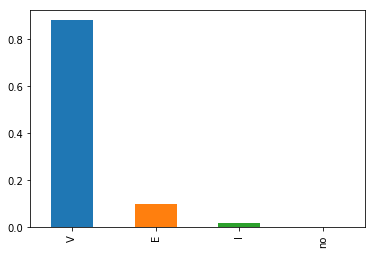

In [22]:
df.reason.value_counts(normalize=True).plot.bar();

In [131]:
df.stop_reason = df.stop_reason.apply(simple_clean)

In [132]:
df.stop_reason.value_counts(dropna=False)

speed related             681119
defective lights          227836
registration              227231
cell phone                221641
moving violation          190596
traffic control signal    178880
other                     175443
stop sign                 166174
stc violation             125707
seatbelt                   80684
display of plates          68558
other error                44224
administrative offense     29224
window tint                28170
suspended license          11555
unlicensed operation        9499
equipment violation         6595
nan                          507
Name: stop_reason, dtype: int64

In [133]:
df.stop_reason.value_counts(dropna=False, normalize=True)*100

speed related             27.535057
defective lights           9.210545
registration               9.186087
cell phone                 8.960105
moving violation           7.705073
traffic control signal     7.231440
other                      7.092495
stop sign                  6.717784
stc violation              5.081857
seatbelt                   3.261748
display of plates          2.771540
other error                1.787809
administrative offense     1.181415
window tint                1.138806
suspended license          0.467125
unlicensed operation       0.384009
equipment violation        0.266611
nan                        0.020496
Name: stop_reason, dtype: float64

# 'SearchAuthorizationCode': 'search_reason'

N-Not Applicable  
C-Consent  
I-Inventory  
O-Other:Probable Cause,  Reasonable Suspicion,  Plain View Contraband,  Incident to Arrest,  Drug Dog Alert, Exigent Circumstances

In [138]:
pd.crosstab(df.search_reason, df.search, dropna=False)

search,False,True
search_reason,,
C,276,27063
I,318,15710
N,2381540,3290
O,14766,30670


In [148]:
276+318+14766

15360

In [150]:
100*(276+318+14766)/nobs

0.6209465149174719

In [143]:
df.search_reason.value_counts(dropna=False)

N      2384830
O        45436
C        27339
I        16028
NaN         10
Name: search_reason, dtype: int64

In [146]:
df.search_reason.value_counts(normalize=True, dropna=False)*100

N      96.409627
O       1.836805
C       1.105212
I       0.647951
NaN     0.000404
Name: search_reason, dtype: float64

In [144]:
df[df.search==True].search_reason.value_counts(dropna=False)

O      30670
C      27063
I      15710
N       3290
NaN       10
Name: search_reason, dtype: int64

In [145]:
df[df.search==True].search_reason.value_counts(normalize=True, dropna=False)*100

O      39.964557
C      35.264454
I      20.470922
N       4.287036
NaN     0.013031
Name: search_reason, dtype: float64

In [23]:
df.state_res.value_counts(normalize=True, dropna=False)

True     0.861496
False    0.138504
Name: state_res, dtype: float64

N      0.964096
O      0.018368
C      0.011052
I      0.006480
NaN    0.000004
Name: search_reason, dtype: float64

In [25]:
df.stop_reason.value_counts(normalize=True, dropna=False)

Speed Related             0.275351
Defective Lights          0.092105
Registration              0.091861
Cell Phone                0.089601
Moving Violation          0.077051
Traffic Control Signal    0.072314
Other                     0.070925
Stop Sign                 0.067165
STC Violation             0.050819
Seatbelt                  0.032617
Display of Plates         0.027715
Other/Error               0.017878
Administrative Offense    0.011814
Window Tint               0.011388
Suspended License         0.004671
Unlicensed Operation      0.003840
Equipment Violation       0.002666
NaN                       0.000205
Stop Sign                 0.000013
Name: stop_reason, dtype: float64

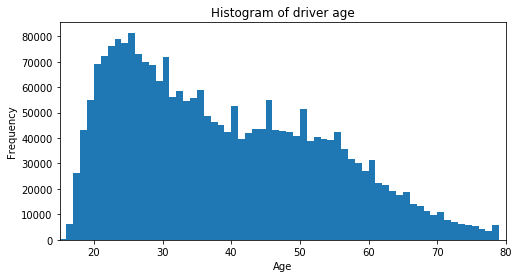

In [26]:
df.age.plot.hist(xlim= (15,80), bins=range(0,80,1), figsize=(8,4))
plt.title('Histogram of driver age')
plt.xlabel('Age');

In [27]:
df.age.value_counts().sort_index()

1.0       350
2.0        94
3.0        60
4.0        79
5.0        49
6.0        32
7.0         6
8.0        21
9.0        13
10.0       40
11.0       11
12.0       22
13.0       29
14.0       96
15.0      275
16.0     6115
17.0    26053
18.0    43142
19.0    54974
20.0    69234
21.0    72068
22.0    76335
23.0    78836
24.0    77265
25.0    81375
26.0    73117
27.0    69777
28.0    68678
29.0    62438
30.0    71729
        ...  
70.0    10927
71.0     7601
72.0     7179
73.0     6238
74.0     5783
75.0     5577
76.0     4404
77.0     3504
78.0     3321
79.0     2673
80.0     3045
81.0     2020
82.0     1820
83.0     1596
84.0     1406
85.0     1278
86.0      962
87.0      836
88.0      684
89.0      521
90.0      456
91.0      304
92.0      179
93.0      153
94.0      101
95.0       76
96.0      123
97.0      216
98.0      132
99.0      661
Name: age, Length: 99, dtype: int64

In [28]:
df.ethnic.value_counts(normalize=True, dropna=False)

N    0.848802
H    0.132780
M    0.018419
Name: ethnic, dtype: float64

In [29]:
df.race.value_counts(normalize=True, dropna=False)

W    0.816177
B    0.156177
A    0.019664
I    0.007983
Name: race, dtype: float64

In [30]:
df.sex.value_counts(normalize=True, dropna=False)

M    0.631934
F    0.368066
Name: sex, dtype: float64

In [31]:
df.town_res.value_counts(normalize=True, dropna=False)

False    0.688058
True     0.311942
Name: town_res, dtype: float64